# Projeto Estatística II - Grupo 3
Grupo: Alex Moulin, Antonio Zanutto, Carolina Yumi, Gabriel Mourão, Haroldo Viana, Rafael RIbeiro e Thaís Falcão

## BRAIN STORM

- Objetivo deste projeto é lidar com um problema real e tentar resolvê-lo utilizando um modelo de regressão.
- Realizamos uma análise abrangente, explicando cada etapa e justificando cada ação escolhida.
- Incluímos gráficos e tabelas comparativas para auxiliar na visualização dos dados.

## BASE DE DADOS

A base de dados escolhida foi obtida no Kaggle e pode ser verificada <a href="https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv" target="_blank">clicando aqui</a>.

A base de dados é composta pelas seguintes características de imóveis:
- Cidade do imóvel
- Área (m²) do imóvel
- Quantidade de quartos
- Quantidade de banheiros
- Quantidade de vagas de estacionamento
- Andar em que o imóvel está localizado
- Se é permitido ter animais de estimação
- Se é mobiliado ou não
- Taxa de condomínio (R$)
- Aluguel (R$)
- IPTU (R$)
- Seguro contra incêndio (R$)
- Total (R$)

## INICIANDO O PROJETO

**Carregando as bibliotecas**

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Carregando a base de dados**

In [404]:
df = pd.read_csv(r'db\houses_to_rent_v2.csv')
# Verificando as primeiras linhas da base de dados
df.head()

,Cidade,Área (m2),Quartos,Banheiro,Vagas de Est.,Andar,Permitido pets,Mobiliado,Taxa de Cond. (R$),Aluguel (R$),IPTU (R$),Seguro incêndio (R$),Total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


**Definindo o problema**

- O objetivo desse projeto é desenvolver um modelo que prevê os preços de aluguel de imovéis a partir de suas características.

## ANÁLISE E EXPLORAÇÃO DOS DADOS

**Faça uma análise detalhada do conjunto de dados escolhidos.**

- Identifique os tipos de dados de cada coluna e caso seja necessário, faça uma conversão no tipo de dado. Em muitas situações é interessante renomear as colunas. OK
- Verifique se existem valores nulos, e caso existam, elabore uma estrategia para lidar com eles (apagar eles, substituir com outro valor, etc.). OK
- Faça uma análise estatistica dos dados para determinar aqueles que provavelmente não vão contribuir durante a modelagem (anomalías e outrliers).
- Pode aplicar escalonamento nos dados, para manter todos eles na mesma escala.
- Caso tenha features do tipo categorico e queria usar elas durante a modelagem, transforme elas para um valor numerico (encoding!).

**Identificando os tipos de dados**

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cidade                10692 non-null  object
 1   Área (m2)             10692 non-null  int64 
 2   Quartos               10692 non-null  int64 
 3   Banheiro              10692 non-null  int64 
 4   Vagas de Est.         10692 non-null  int64 
 5   Andar                 10692 non-null  object
 6   Permitido pets        10692 non-null  object
 7   Mobiliado             10692 non-null  object
 8   Taxa de Cond. (R$)    10692 non-null  int64 
 9   Aluguel (R$)          10692 non-null  int64 
 10  IPTU (R$)             10692 non-null  int64 
 11  Seguro incêndio (R$)  10692 non-null  int64 
 12  Total (R$)            10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


A variável 'Andar' deveria ser numérica e as variáveis 'Permitido pets' e 'Mobiliado' deveriam ser booleanas.

In [406]:
df.Andar.unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

A variável andar tem um valor '-', que indica que o imóvel não tem andar associado (ou seja, é uma casa e não um apartamento). Vamos substituir esses valores por zero e transformar essa coluna em inteira!

In [407]:
df.Andar = df.Andar.apply(lambda x: 0 if x == '-' else int(x))
df.Andar.astype(int)
df.Andar

0         7
1        20
2         6
3         2
4         1
         ..
10687     5
10688    17
10689     8
10690     8
10691     0
Name: Andar, Length: 10692, dtype: int64

Optou-se por criar uma variável 'Apartamento' booleana, com 0 indicando casa e 1 indicando apartamento.

**Criando variável booleana Apartamento**

In [408]:
df['Apartamento'] = df['Andar'].apply(lambda x: 0 if x == 0 else 1)
df

,Cidade,Área (m2),Quartos,Banheiro,Vagas de Est.,Andar,Permitido pets,Mobiliado,Taxa de Cond. (R$),Aluguel (R$),IPTU (R$),Seguro incêndio (R$),Total (R$),Apartamento
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,1
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,1
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,1
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,1
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926,1
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260,1
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390,1
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020,1


**Transformando variável 'Permitido pets' em booleana**

In [409]:
df['Permitido pets'] = df['Permitido pets'].apply(lambda x: 1 if x == 'acept' else 0)
df['Permitido pets']


0        1
1        1
2        1
3        1
4        0
        ..
10687    0
10688    1
10689    0
10690    1
10691    1
Name: Permitido pets, Length: 10692, dtype: int64

**Transformando variável 'Mobiliado' em booleana**

In [410]:
df['Mobiliado'] = df['Mobiliado'].apply(lambda x: 1 if x == 'furnished' else 0)
df['Mobiliado']

0        1
1        0
2        0
3        0
4        0
        ..
10687    1
10688    0
10689    1
10690    1
10691    0
Name: Mobiliado, Length: 10692, dtype: int64

**Renomeando as colunas**

In [411]:
df = df.rename(columns={'Área (m2)': 'Area', 'Vagas de Est.': 'Vagas_Est', 'Permitido pets': 'Permitido_pets', 'Taxa de Cond. (R$)':'Taxa_Cond', 
                   'Aluguel (R$)': 'Aluguel','IPTU (R$)': 'IPTU', 'Seguro incêndio (R$)': 'Seguro_incendio', 'Total (R$)': 'Total'})

**Quantidade de registros**

In [412]:
print(f'O dataframe possui {df.shape[0]} registros')

O dataframe possui 10692 registros


**Removendo linhas duplicadas**

In [413]:
df = df.drop_duplicates()
df = df.drop(columns=['Seguro_incendio','Total'])
print(f'O dataframe agora possui {df.shape[0]} registros')

O dataframe agora possui 10334 registros


**Verificando se existem dados nulos**

In [414]:
qtd_faltantes = df.isnull().sum()
df_faltantes =  pd.DataFrame({'Dados faltantes': qtd_faltantes})
pd.set_option('display.max_rows', 15)
df_faltantes

,Dados faltantes
Cidade,0
Area,0
Quartos,0
Banheiro,0
Vagas_Est,0
Andar,0
Permitido_pets,0
Mobiliado,0
Taxa_Cond,0
Aluguel,0


**Medidas descritivas das variáveis**

In [415]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10334.0,152.439423,545.875595,11.0,59.00,95.0,190.00,46335.0
Quartos,10334.0,2.539965,1.168185,1.0,2.00,3.0,3.00,13.0
Banheiro,10334.0,2.268725,1.414650,1.0,1.00,2.0,3.00,10.0
Vagas_Est,10334.0,1.644475,1.598527,0.0,1.00,1.0,2.00,12.0
Andar,10334.0,5.100929,6.067906,0.0,1.00,3.0,8.00,301.0
Permitido_pets,10334.0,0.781498,0.413250,0.0,1.00,1.0,1.00,1.0
Mobiliado,10334.0,0.243371,0.429138,0.0,0.00,0.0,0.00,1.0
Taxa_Cond,10334.0,1091.243952,11446.092263,0.0,180.00,571.0,1286.75,1117000.0
Aluguel,10334.0,3966.296013,3436.190007,450.0,1598.25,2750.0,5000.00,45000.0
IPTU,10334.0,376.929263,3160.602165,0.0,41.00,130.0,389.75,313700.0


## ANÁLISE DAS VARIÁVEIS

**Nome das colunas**

In [416]:
df.columns

Index(['Cidade', 'Area', 'Quartos', 'Banheiro', 'Vagas_Est', 'Andar',
       'Permitido_pets', 'Mobiliado', 'Taxa_Cond', 'Aluguel', 'IPTU',
       'Apartamento'],
      dtype='object')

**Separação das colunas por tipo**

In [417]:
col_num = ['Area', 'Quartos', 'Banheiro', 'Vagas_Est', 'Andar', 'Taxa_Cond', 'Aluguel', 'IPTU']
col_bool = ['Permitido_pets', 'Mobiliado','Apartamento']
col_cat = ['Cidade']

### Variáveis numéricas

**Medidas descritivas das variáveis numéricas**

In [418]:
for col in col_num:
    display(df[col].describe())
    print('')

count    10334.000000
mean       152.439423
std        545.875595
min         11.000000
25%         59.000000
50%         95.000000
75%        190.000000
max      46335.000000
Name: Area, dtype: float64

count    10334.000000
mean         2.539965
std          1.168185
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         13.000000
Name: Quartos, dtype: float64

count    10334.000000
mean         2.268725
std          1.414650
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: Banheiro, dtype: float64

count    10334.000000
mean         1.644475
std          1.598527
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: Vagas_Est, dtype: float64

count    10334.000000
mean         5.100929
std          6.067906
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        301.000000
Name: Andar, dtype: float64

count    1.033400e+04
mean     1.091244e+03
std      1.144609e+04
min      0.000000e+00
25%      1.800000e+02
50%      5.710000e+02
75%      1.286750e+03
max      1.117000e+06
Name: Taxa_Cond, dtype: float64

count    10334.000000
mean      3966.296013
std       3436.190007
min        450.000000
25%       1598.250000
50%       2750.000000
75%       5000.000000
max      45000.000000
Name: Aluguel, dtype: float64

count     10334.000000
mean        376.929263
std        3160.602165
min           0.000000
25%          41.000000
50%         130.000000
75%         389.750000
max      313700.000000
Name: IPTU, dtype: float64

**Distribuição das variáveis numéricas**

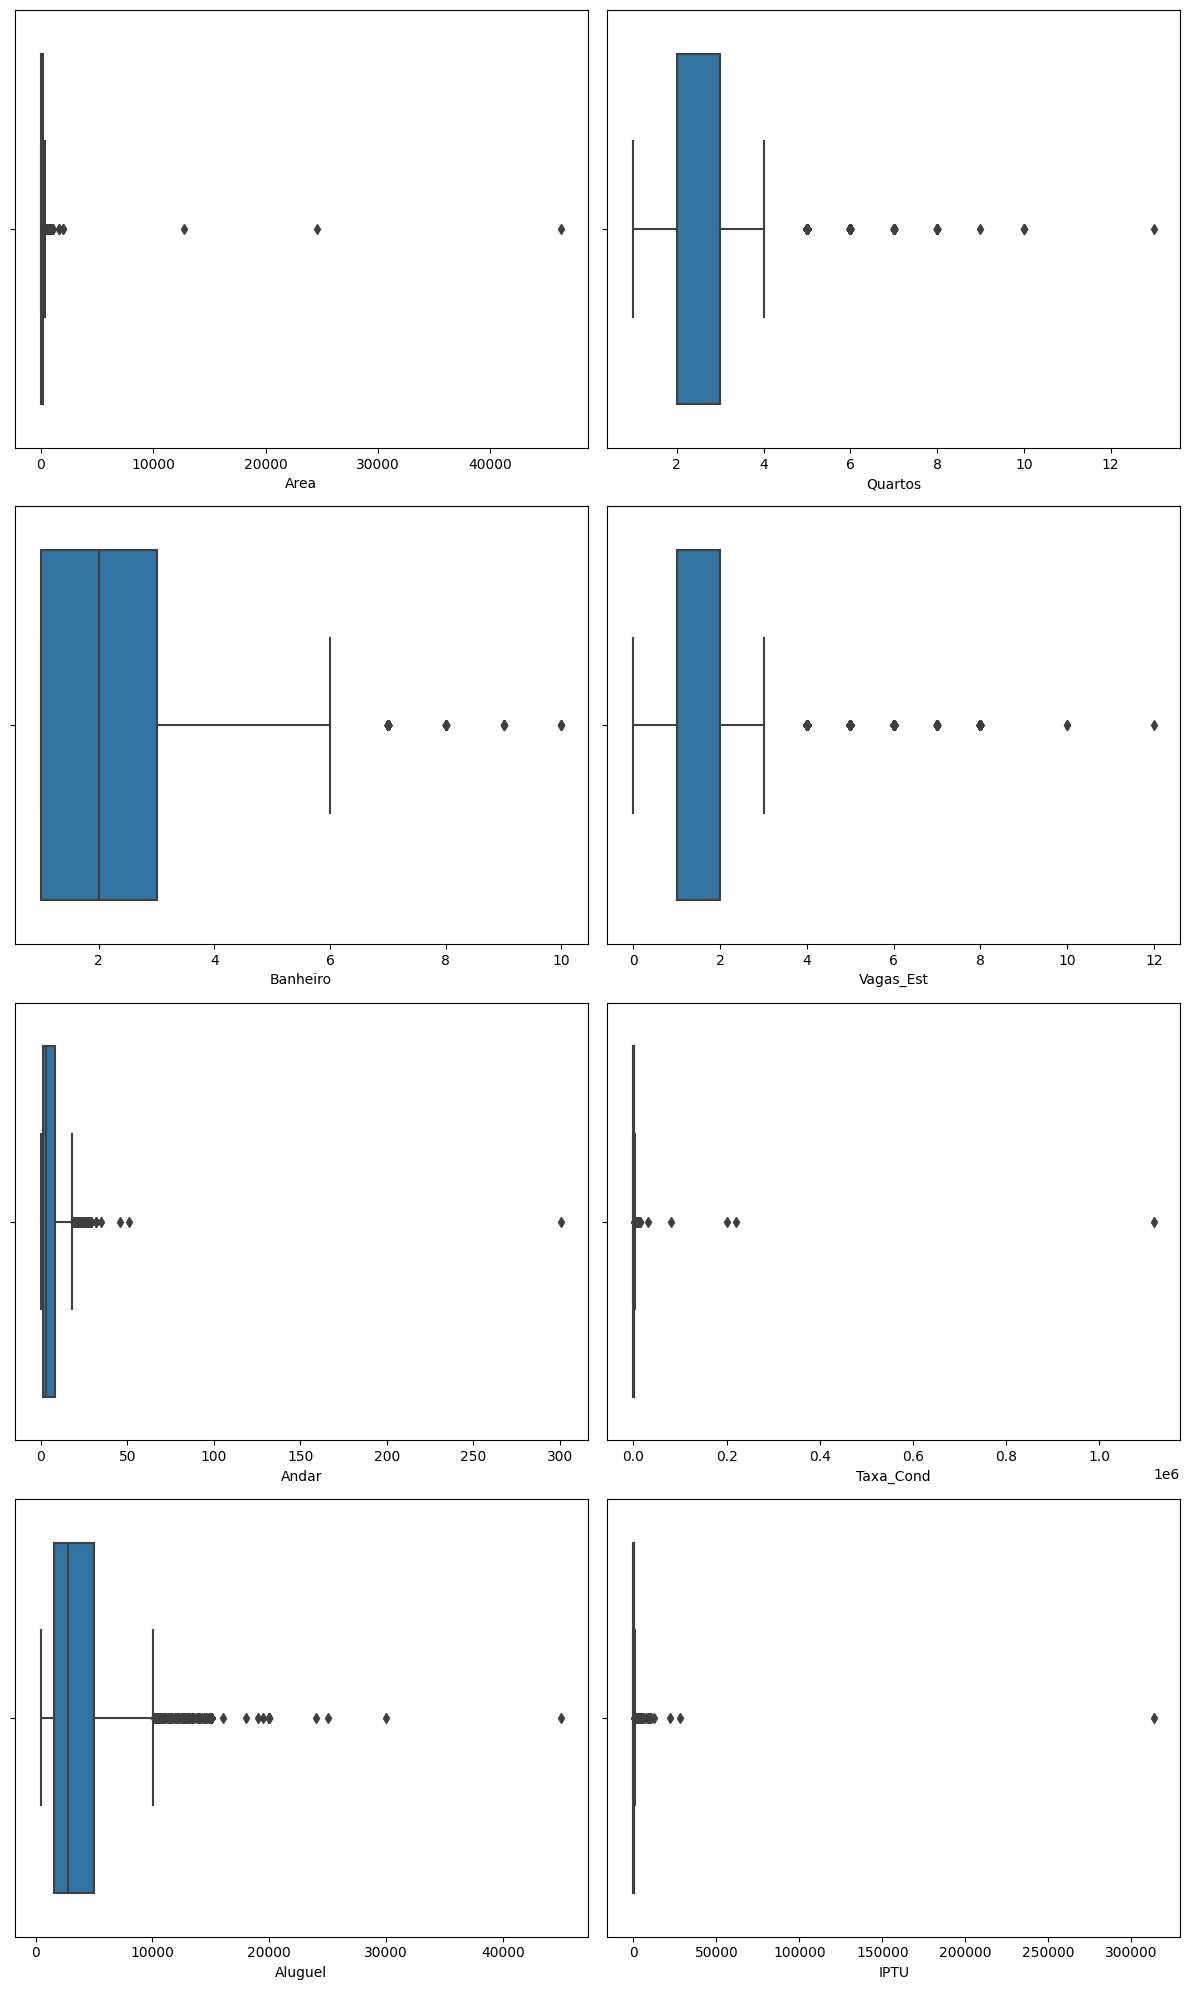

In [419]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for i in range(0,8):
    sns.boxplot(ax=axes[i//2,i%2], data=df, x=col_num[i])
plt.tight_layout()

**Removendo anomalias**

In [420]:
df = df[df.Andar < 50] # Removendo andares maiores que 50
df = df[df.Taxa_Cond < 10000] # Removendo taxa de condomínio maiores que 20000
df = df[df.IPTU < 7000] # Removendo IPTU maiores que 50000
df = df[df.Area < 10000] 

**Removendo observações com IPTU = 0**

In [421]:
df = df[df.IPTU != 0]

**Verificando a distribuição das variáveis após a remoção de anomalias**

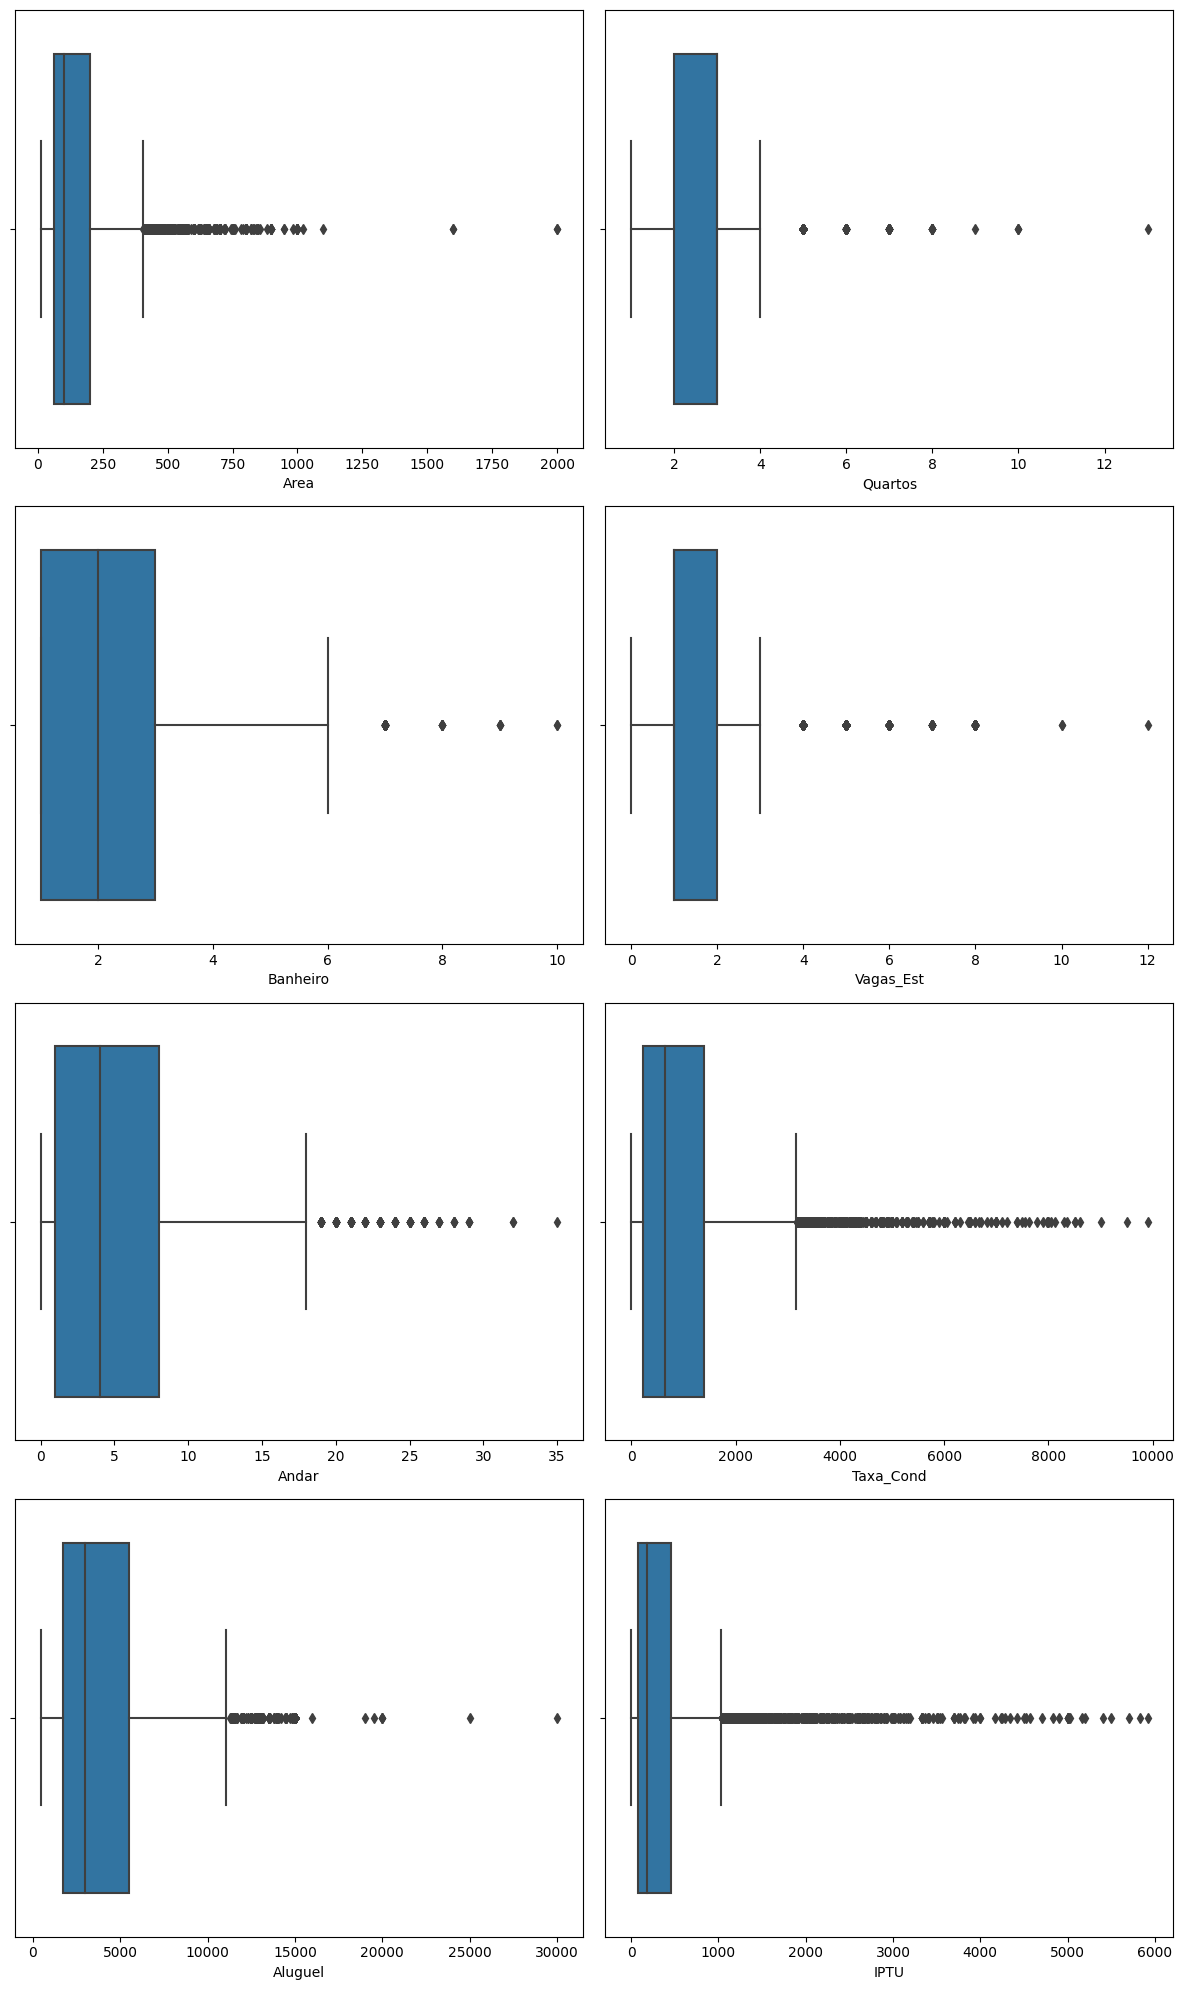

In [422]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for i in range(0,8):
    sns.boxplot(ax=axes[i//2,i%2], data=df, x=col_num[i])
plt.tight_layout()

**Distribuição de frequência das variáveis numéricas**

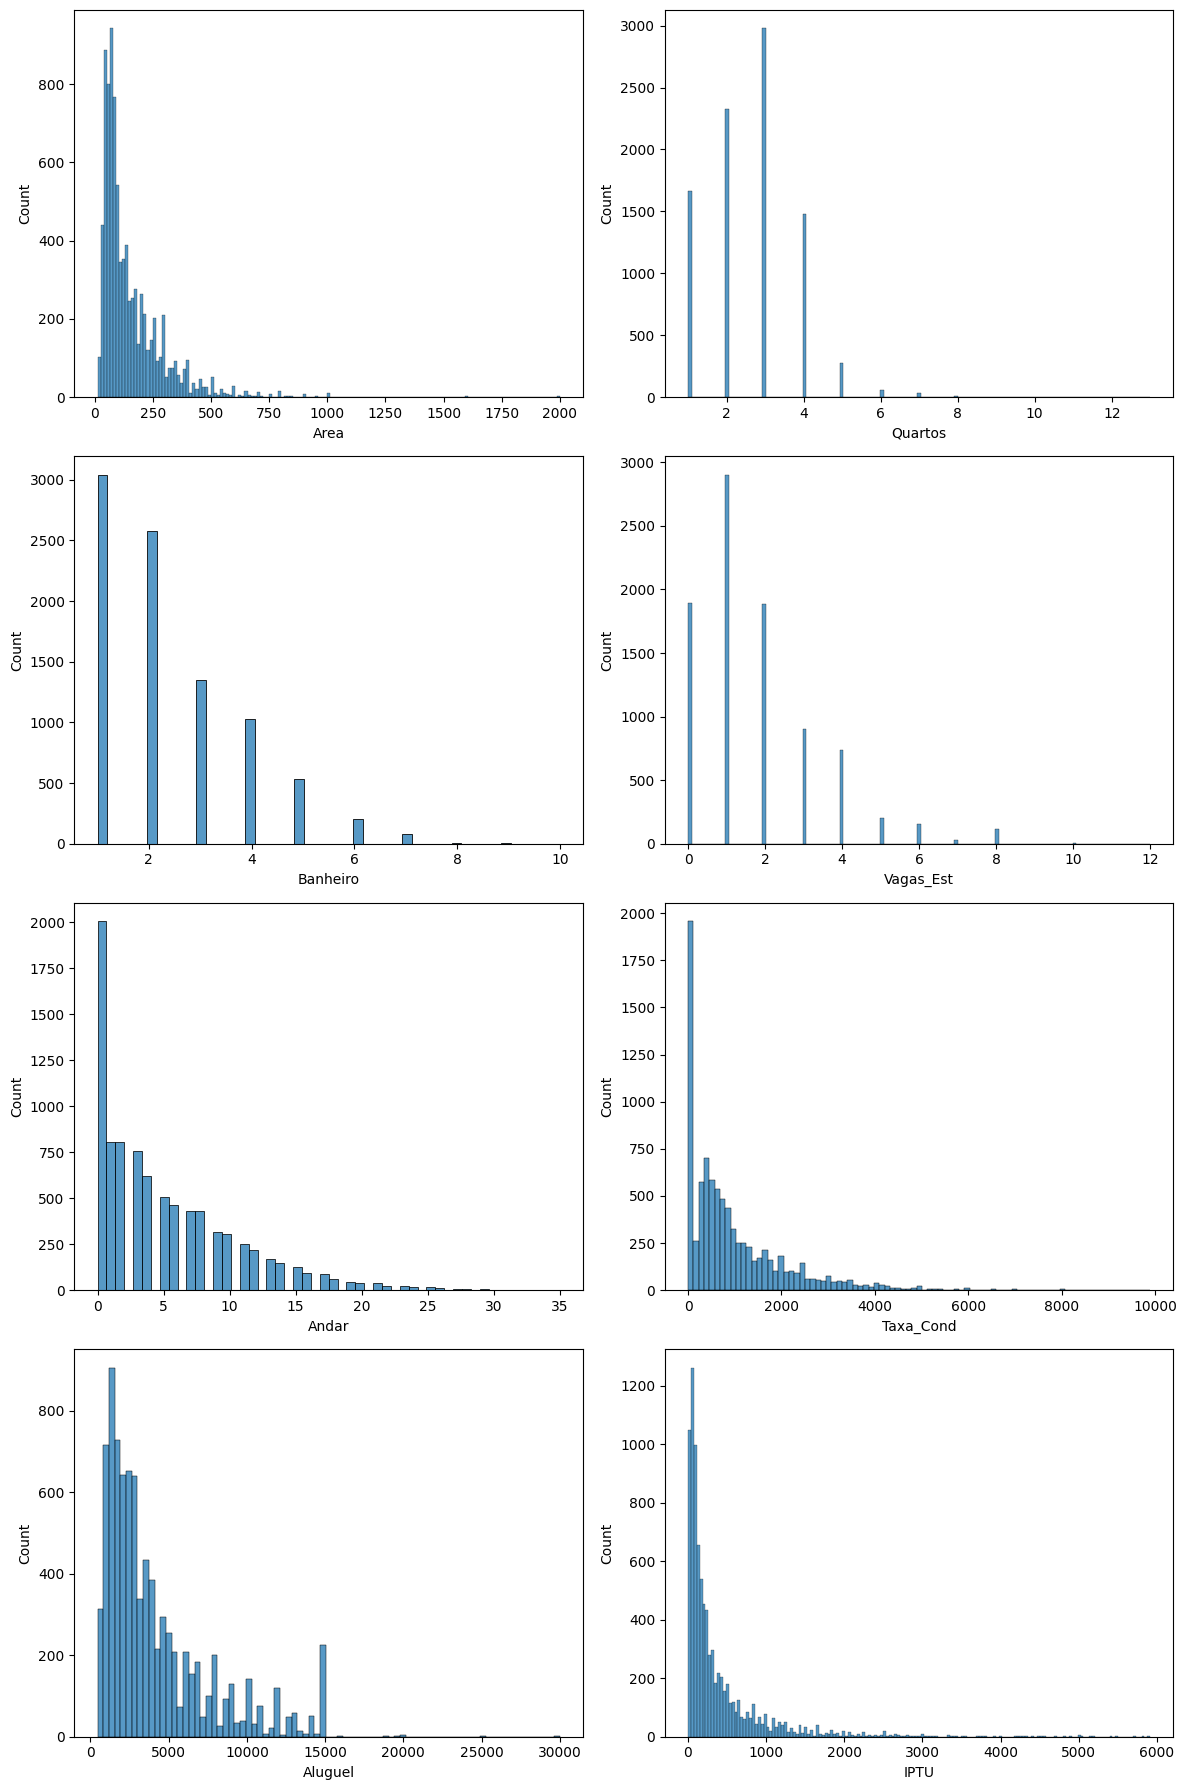

In [423]:
fig, axes = plt.subplots(4, 2, figsize=(12, 18))

for i in range(0,8):
    sns.histplot(ax=axes[i//2,i%2], data=df, x=col_num[i])
plt.tight_layout()

**Assimetria das variáveis numéricas**

In [424]:
print('Skewness das variáveis:')
for i in col_num:
    print(i,':',df[i].skew()) #assimetria a direita

Skewness das variáveis:
Area : 2.7673346714337477
Quartos : 0.6350473214301505
Banheiro : 1.0768104754110193
Vagas_Est : 1.3927803287215765
Andar : 1.3055064740793865
Taxa_Cond : 2.133644653895537
Aluguel : 1.5628233503371065
IPTU : 3.491578108311306


**Assimetria do Log das variáveis numéricas**

In [425]:
print('Skewness dos logs das variáveis:')
for i in col_num:
    print('Log',i,':',np.log10(df[i][df[i]>0]).skew()) #assimetria a direita

Skewness dos logs das variáveis:
Log Area : 0.237709457826927
Log Quartos : -0.5300853039284752
Log Banheiro : 0.17651528367474179
Log Vagas_Est : 0.4733369221215149
Log Andar : -0.3096127986261091
Log Taxa_Cond : -1.3415902215575246
Log Aluguel : 0.12732886767077226
Log IPTU : -0.2669783610610505


**Métrica de localização**

O IPTU é um imposto cujo valor é calculado por uma aliquota definida pela prefeitura para cada parte da cidade multiplicada pela área do imóvel. É de conhecimento geral que a valorização do imóvel (tanto pra venda, quanto para aluguel), depende tanto de sua localização quanto do imóvel em si, portanto, calcular essa alíquota do imóvel pode ser importante para a construção de um modelo mais interessante.

In [426]:
df['aliquota'] = df['IPTU']/df['Area']
df.head()

,Cidade,Area,Quartos,Banheiro,Vagas_Est,Andar,Permitido_pets,Mobiliado,Taxa_Cond,Aluguel,IPTU,Apartamento,aliquota
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,1,3.014286
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,1,5.468750
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,1,0.431373
4,São Paulo,25,1,1,0,1,0,0,0,800,25,1,1.000000
5,São Paulo,376,3,3,7,0,1,0,0,8000,834,0,2.218085


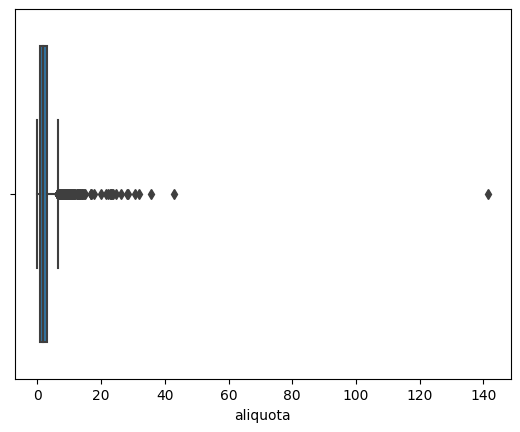

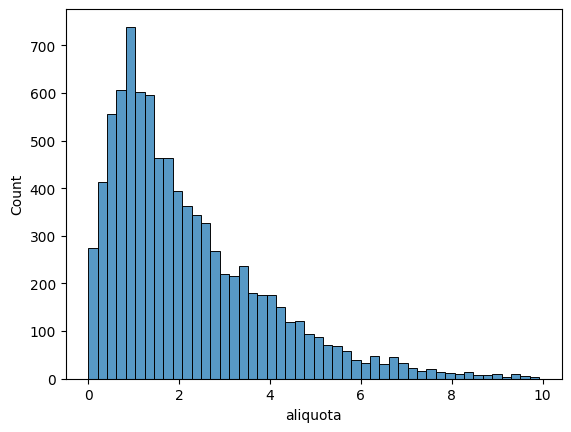

In [427]:
sns.boxplot(data=df, x='aliquota')
plt.show()

sns.histplot(data=df[df.aliquota <10], x='aliquota')
plt.show()


**Tabela de correlação entre variáveis numéricas**

In [428]:
correlacao = df.corr(numeric_only=True)
display(correlacao)

,Area,Quartos,Banheiro,Vagas_Est,Andar,Permitido_pets,Mobiliado,Taxa_Cond,Aluguel,IPTU,Apartamento,aliquota
Area,1.000000,0.678908,0.740375,0.675659,-0.131448,0.113534,-0.008262,0.279712,0.649695,0.653244,-0.402168,0.104892
Quartos,0.678908,1.000000,0.722393,0.597205,-0.118258,0.145729,-0.079540,0.258435,0.523464,0.481210,-0.291730,0.120250
Banheiro,0.740375,0.722393,1.000000,0.684204,-0.007457,0.100874,0.018990,0.396574,0.657130,0.617746,-0.252049,0.222384
Vagas_Est,0.675659,0.597205,0.684204,1.000000,-0.049922,0.110951,-0.010550,0.259999,0.558196,0.562154,-0.324728,0.203517
Andar,-0.131448,-0.118258,-0.007457,-0.049922,1.000000,-0.061293,0.138475,0.363672,0.077060,0.070270,0.523644,0.154862
Permitido_pets,0.113534,0.145729,0.100874,0.110951,-0.061293,1.000000,-0.090377,-0.000112,0.046439,0.063961,-0.072522,-0.023026
Mobiliado,-0.008262,-0.079540,0.018990,-0.010550,0.138475,-0.090377,1.000000,0.122853,0.166220,0.039313,0.127955,0.109103
Taxa_Cond,0.279712,0.258435,0.396574,0.259999,0.363672,-0.000112,0.122853,1.000000,0.437761,0.549672,0.413523,0.366979
Aluguel,0.649695,0.523464,0.657130,0.558196,0.077060,0.046439,0.166220,0.437761,1.000000,0.616212,-0.193070,0.280062
IPTU,0.653244,0.481210,0.617746,0.562154,0.070270,0.063961,0.039313,0.549672,0.616212,1.000000,-0.110467,0.581807


**Heatmap da correlação das variáveis numéricas**

<AxesSubplot: >

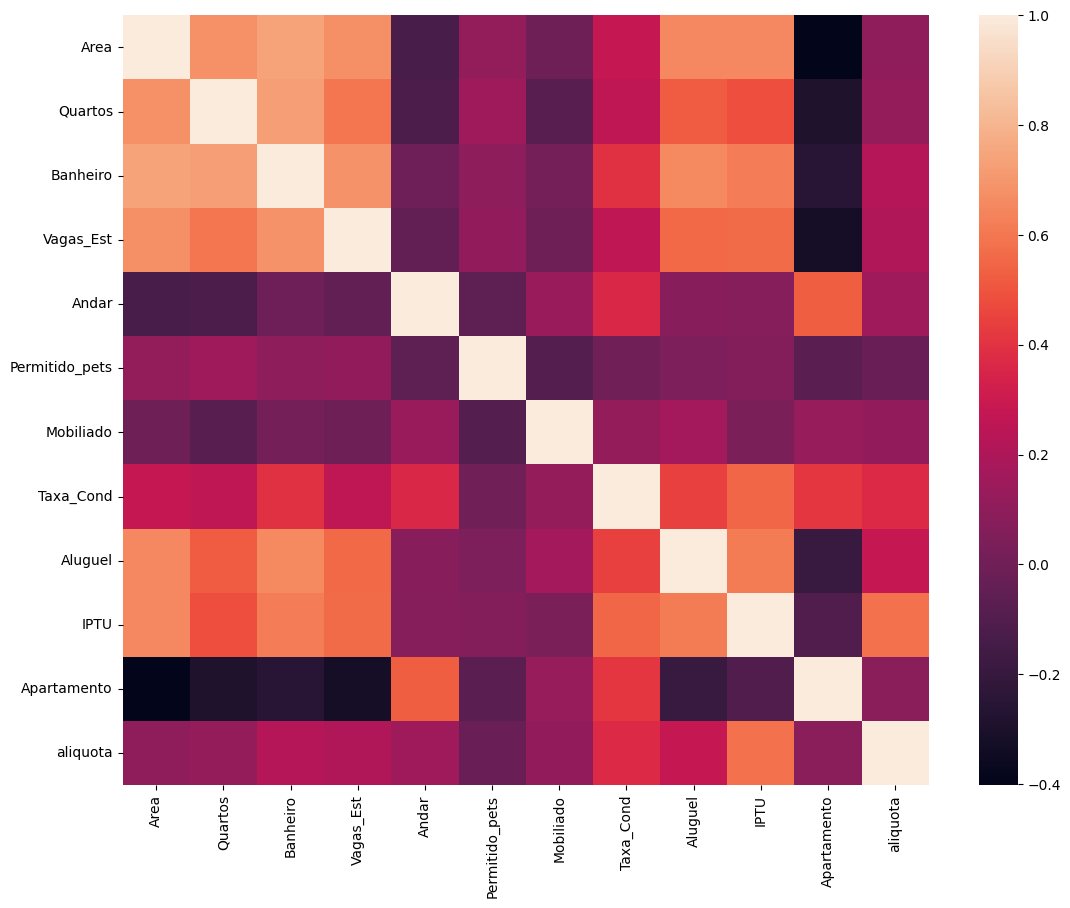

In [429]:
plt.figure(figsize=(13, 10))
sns.heatmap(correlacao)

In [430]:
(correlacao['Aluguel']).sort_values(ascending = False)

Aluguel           1.000000
Banheiro          0.657130
Area              0.649695
IPTU              0.616212
Vagas_Est         0.558196
Quartos           0.523464
Taxa_Cond         0.437761
aliquota          0.280062
Mobiliado         0.166220
Andar             0.077060
Permitido_pets    0.046439
Apartamento      -0.193070
Name: Aluguel, dtype: float64

Os atributos que apresentam maior correlação com a variável 'Aluguel' (positiva e negativa) são:
* Banheiro
* Vagas_Est
* Quartos
* IPTU
* Taxa_Cond

\
 Após tratamento de dados notou-se que a Taxa de condomínio apresenta uma boa correlação, enquanto a aliquota não apresentou o resultado esperado.

**Quantidade de observações por cidade**

In [431]:
for i in df.Cidade.unique():
    print(i,df[df.Cidade==i].shape[0])

São Paulo 4722
Porto Alegre 1031
Rio de Janeiro 1273
Campinas 732
Belo Horizonte 1073


## MODELAGEM

- Problema: regressão. Desejamos estimar o valor de aluguel dadas as características do imóvel.
- Vamos utilizar uma regressão linear para resolver este problema!

**Importando a classe do estimador**

In [432]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

**Instanciando a classe do estimador**

In [433]:
reg_lin = LinearRegression()

### Modelagem: São Paulo

### Modelagem: Campinas

In [447]:
df_ca = df[df.Cidade == 'Campinas']
df_ca.head()

,Cidade,Area,Quartos,Banheiro,Vagas_Est,Andar,Permitido_pets,Mobiliado,Taxa_Cond,Aluguel,IPTU,Apartamento,aliquota
11,Campinas,46,1,1,1,10,1,0,550,580,43,1,0.934783
15,Campinas,330,4,6,6,0,1,1,680,8000,328,0,0.993939
28,Campinas,208,3,2,4,0,1,0,0,3180,100,0,0.480769
48,Campinas,250,3,3,2,1,1,0,2200,1700,256,1,1.024000
49,Campinas,48,1,1,1,2,1,1,505,1600,59,1,1.229167


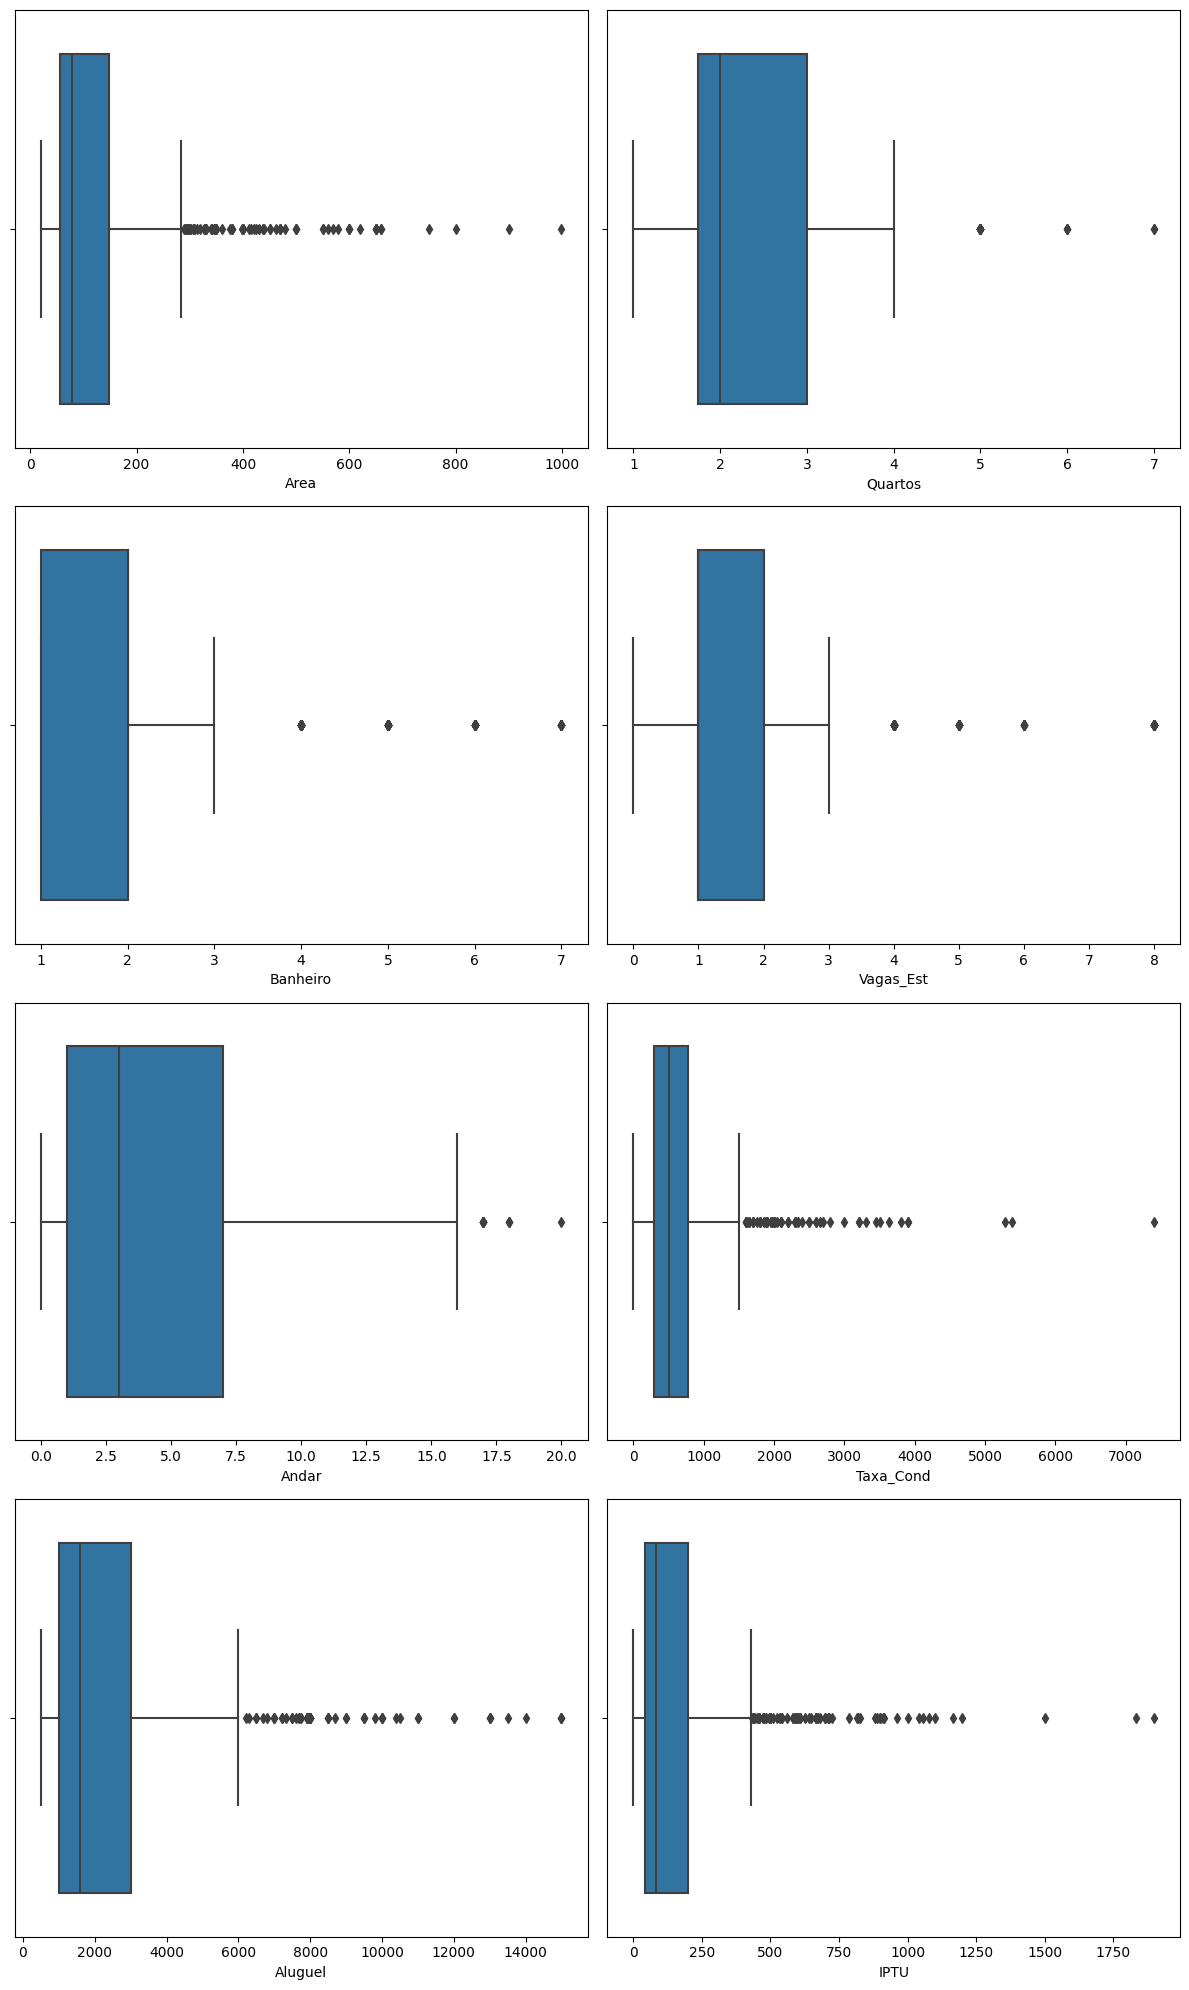

In [449]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
for i in range(0,8):
    sns.boxplot(ax=axes[i//2,i%2], data=df_ca, x=col_num[i])
plt.tight_layout()

In [450]:
corr_ca = df_ca.corr(numeric_only=True)
(corr_ca['Aluguel']).sort_values(ascending = False)

Aluguel           1.000000
Area              0.805116
Banheiro          0.793976
IPTU              0.736722
Vagas_Est         0.652387
Quartos           0.578019
Taxa_Cond         0.416696
aliquota          0.177043
Permitido_pets    0.100893
Mobiliado         0.095650
Andar            -0.076285
Apartamento      -0.358235
Name: Aluguel, dtype: float64

**Separando variável dependente e variáveis independentes**

In [459]:
X = df_ca[['Area', 'Banheiro', 'IPTU']]
y = df_ca.Aluguel
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = .3, random_state=42)

**Aplicando scaler**

In [460]:
mms = MinMaxScaler()

In [461]:
mms.fit(X_train)

MinMaxScaler()

In [462]:
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

**Treinando o modelo**

In [463]:
reg_lin.fit(X_train, y_train)

LinearRegression()

**Verificando valores estimados**

In [464]:
print("Intercepto:", reg_lin.intercept_)
print("Coeficientes angulares:", reg_lin.coef_)

Intercepto: 731.405065012578
Coeficientes angulares: [6683.00210122 3946.51009335 3651.36488288]


**Gráfico valor previsto x valor real**

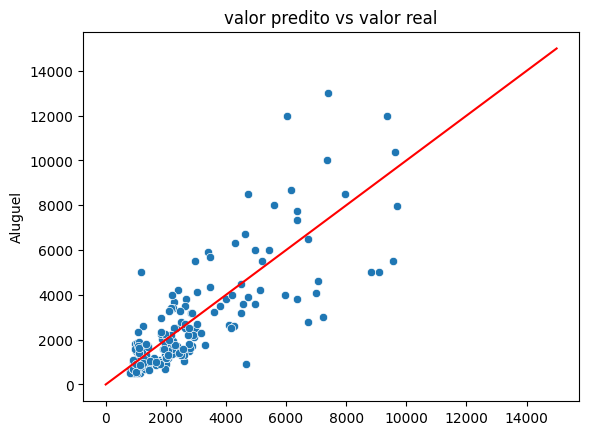

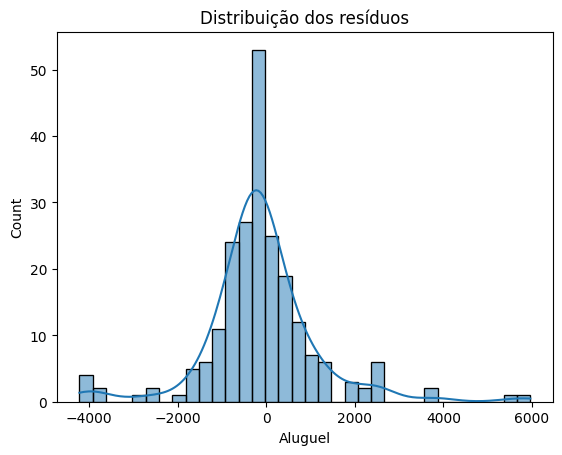

In [467]:
predictions = reg_lin.predict(X_test)

plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_test)
plt.plot(np.linspace(0, 15000, 1000), np.linspace(0, 15000, 1000), color="red")
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_test-predictions, kde=True)
plt.show()

**Métricas de avaliação**

In [468]:
print('R^2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R^2: 0.667684739922269
MAE: 821.8137609534839
MSE: 1641474.1947223584
RMSE: 1281.2002945372587
